# Techniques for Calculating the Efficient Frontier

## Short Sales Allowed with Riskless Lending and Borrowing

There is a single portfolio in return volatility space that is prefered to all other portfolios. The portfolio plots on the ray connecting the riskless asset and a risky portfolio.

**Maximise**

$$ \theta = \frac{\bar{R_{\pi}} - R_F}{\sigma_{\pi}}$$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random 

a, b = [random.uniform(1, 3) for i in range(2)]

In [27]:
R̄ = np.array([14, 8, 20])

cov = np.array([
    [6*6,     0.5*6*3, 0.2*6*15],
    [0.5*6*3, 3*3,      0.4*3*15],
    [0.2*6*15, 0.4*3*15, 15*15]
])

R_f = 5

In [4]:
def security_weights(R̄, cov, R_f):
    δR = R̄-R_f
    A = cov*np.eye(3) + (np.ones(3) - np.eye(3))*cov
    Z = np.linalg.inv(A).dot(δR)
    X = Z/sum(Z)
    return X

In [5]:
def eff_set_lending_borrowing_shorts(R̄, cov, R_f):
    weights = security_weights(R̄, cov, R_f)
    R̄_π = R̄@weights
    σ_π = np.sqrt(weights.T@cov@weights)
    θ = (R̄_π - R_f)/σ_π
    
    x = np.arange(0, 10, 0.01)
    y = [R_f + θ*i for i in x]
    
    plt.plot(x, y)
    plt.scatter(σ_π, R̄_π, marker='x', color='red', s=100)
    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)

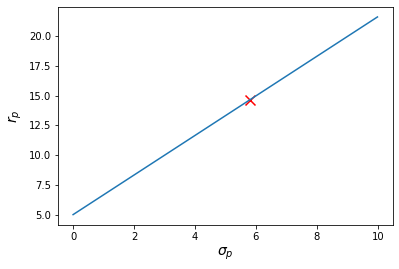

In [6]:
eff_set_lending_borrowing_shorts(R̄, cov, R_f)

## Short Sales Allowed: No Riskless Lending and Borrowing

We an investor can't lend/borrow at the riskless rate the following section must be modified. However, much of the analysis carries over. The efficient set constructed before allowed us to calculate the tandency potfolio which lies on the efficent. Therofre we can assume different rates of interest and find variouse tangeny portolios. The set of these portfolios will plot out the efficient set in return/volatility space.

In [7]:
def eff_set_shorts(R̄, cov):
    
    R_fs = np.arange(-1000, 7, 0.1)
    
    R̄_πs = []
    σ_πs = []
    
    for R_f in R_fs:
        weights = security_weights(R̄, cov, R_f)
        R̄_πs.append(R̄@weights)
        σ_πs.append(np.sqrt(weights.T@cov@weights))

    plt.scatter(σ_πs, R̄_πs)
#   plt.scatter(σ_π, R̄_π, marker='x', color='red', s=100)
    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)
    

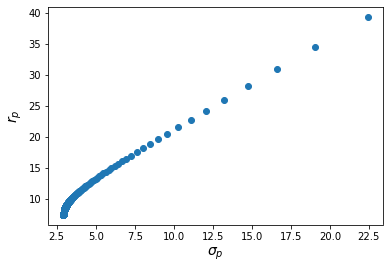

In [8]:
eff_set_shorts(R̄, cov)

In [28]:
def calc_π_r(r_i, x_i, r_j, x_j):

    return r_i*x_i + r_j*x_j

In [29]:
def calc_π_σ(σ_i, x_i, σ_j, x_j, ρ_ij):
  
    
    σ_p_sqrd = σ_i**2*x_i**2 + σ_j**2*x_j**2 + 2*σ_i*σ_j*x_i*x_j*ρ_ij
    return np.sqrt(σ_p_sqrd)

In [30]:
def calc_π_σ(σ_i, x_i, σ_j, x_j, σ_ij):
  
    
    σ_p_sqrd = σ_i**2*x_i**2 + σ_j**2*x_j**2 + 2*σ_ij*x_i*x_j
    return np.sqrt(σ_p_sqrd)

In [31]:
def eff_set_shorts(R̄, cov):
    
    
    weights_a = security_weights(R̄, cov, 5)
    R̄_a = R̄@weights_a
    σ_a = np.sqrt(weights_a.T@cov@weights_a)
    
    
    weights_b = security_weights(R̄, cov, 2)
    R̄_b = R̄@weights_b
    σ_b = np.sqrt(weights_b.T@cov@weights_b)
    
    
    weights_mix = 0.5*weights_a + 0.5*weights_b

    R̄_mix = R̄@weights_mix
    σ_mix = np.sqrt(weights_mix.T@cov@weights_mix)
    print(σ_mix)
    
    num = σ_mix**2 - (0.5**2)*(σ_a**2) - (0.5**2)*(σ_b**2)
    denom = 2*0.5*0.5
    σ_cross = num / denom


    r_p_short = []
    σ_p_short = []
    
    print('Portfolio A: return = {}, std = {}'.format(R̄_a, σ_a))
    print('Portfolio B: return = {}, std = {}'.format(R̄_b, σ_b))
    print(R̄_b)

    for x_a in np.arange(-2,1, 0.01):
        x_b = 1-x_a
        r_p_short.append(calc_π_r(R̄_a, x_a, R̄_b, x_b))
        σ_p_short.append(calc_π_σ(σ_a, x_a, σ_b, x_b, σ_cross))
    
    plt.scatter(σ_p_short, r_p_short)
#   plt.scatter(σ_π, R̄_π, marker='x', color='red', s=100)
    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)

In [32]:
[random.uniform(8, 20) for _ in range(2)]

[15.622394976049723, 13.132331535063807]

4.6753564926466655
Portfolio A: return = 14.666666666666668, std = 5.816642788871717
Portfolio B: return = 10.7, std = 3.7016888037759195
10.7


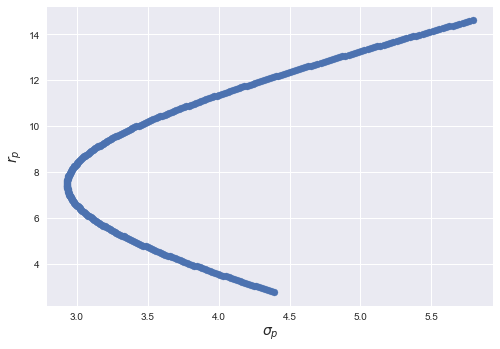

In [80]:
eff_set_shorts(R̄, cov)

# Riskless Lending and Borrowing with Short Sales Not Allowed

**Minimize**

$$ y^T \Sigma y $$

**Subject to**

$$ (\bar{R} - R_F)^T y = 1 $$

$$\hat{A} y \geq 0$$

$$ 0 \leq y$$

In [147]:
rifk_free_rate = 5
A = opt.matrix(np.transpose(np.array(avg_ret) - 5.0)[None,:])

In [148]:
np.array(A)

array([[ 9.,  3., 15.]])

In [151]:
b = opt.matrix(np.array([1.]))

In [152]:
np.array(b)

array([[1.]])

In [153]:
# P matrix is the covariance matrix
P = opt.matrix(cov)

In [154]:
# no constraint on q
q = opt.matrix(np.zeros((n, 1)))

In [168]:
G = opt.matrix(-np.identity(n))

In [169]:
np.array(G)

array([[-1., -0., -0.],
       [-0., -1., -0.],
       [-0., -0., -1.]])

In [170]:
h = opt.matrix(np.zeros((n,1)))

In [171]:
np.array(h)

array([[0.],
       [0.],
       [0.]])

In [173]:
sol = opt.solvers.qp(P, q, G, h, A, b)

In [175]:
weights = np.array(sol['x'])

In [177]:
weights

array([[0.08045976],
       [0.00574717],
       [0.01724138]])

In [179]:
normalised = weights/sum(weights)

In [181]:
normalised

array([[0.77777746],
       [0.05555594],
       [0.16666659]])

In [184]:
r = normalised.T@avg_ret

In [186]:
v = normalised.T@cov@normalised

In [188]:
np.sqrt(v)

array([[5.81664113]])

## No Short Selling and No Riskless Lending and Borrowing

The efficient set is found by minimising the risk level for a given level of expected return. Therfore, one can specify the return at some level and minimize the risk, obtaining a single point on the efficient frontier. We can fromalize this by say we seek to 

**Minimize**

$$ \sum_{i=1}^N X_i^2\sigma_i^2 + \sum_{i=1}^N \sum_{j=1,j\neq i}^N X_iX_j \sigma_i^2 \sigma_j^2$$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

$$ \sum_{i=1}^N X_i \bar{R}_i = \bar{R}_{\pi}$$

$$ X_i \geq 0 \text{, i=1,...,N}$$

In [7]:
import cvxopt as opt
from cvxopt import matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [75]:
# avg_ret = [ .0215, .0267, .0158 , .0452, .0318]

# cov = [[.0096, .0089, .0046, .0019, .0137],
#         [.0089, .0440, .0064, .0071, .0232],
#         [.0046, .0064, .0088, .0036, .0048],
#         [.0019, .0071, .0036, .0824, .0052],
#         [.0137, .0232, .0048, .0052, .0878]]


avg_ret = [14, 8, 20]
cov = [[6 * 6, 0.5 * 6 * 3, 0.2 * 6 * 15],
       [0.5 * 6 * 3, 3 * 3, 0.4 * 3 * 15],
       [0.2 * 6 * 15, 0.4 * 3 * 15, 15 * 15]]


In [35]:
cov

[[36, 9.0, 18.000000000000004],
 [9.0, 9, 18.000000000000004],
 [18.000000000000004, 18.000000000000004, 225]]

In [9]:
n = 3

In [47]:
# P matrix is the covariance matrix
P = opt.matrix(cov)

In [48]:
# no constraint on q
q = opt.matrix(np.zeros((n, 1)))

In [49]:
G = opt.matrix(np.concatenate((
                -np.transpose(np.array(avg_ret))[None,:], 
                -np.identity(n)), 0))

In [50]:
np.array(G)

array([[-14.,  -8., -20.],
       [ -1.,  -0.,  -0.],
       [ -0.,  -1.,  -0.],
       [ -0.,  -0.,  -1.]])

In [57]:
h = opt.matrix(np.concatenate((np.ones((1,1))*-16, np.zeros((n,1)))))

In [69]:
np.array(h)

array([[-16.],
       [  0.],
       [  0.],
       [  0.]])

In [70]:
A = opt.matrix(1.0, (1,n))
b = opt.matrix(1.0)

In [71]:
opt.solvers.options['show_progress'] = False
sol = opt.solvers.qp(P, q, G, h, A, b)

In [72]:
weights = np.array(sol['x'])

In [73]:
print(weights)

[[6.66666561e-01]
 [4.80533445e-08]
 [3.33333391e-01]]


In [74]:
avg_ret

[14, 8, 20]

In [75]:
weights.T@avg_ret

array([16.00000006])

In [76]:
weights.T@cov@weights

array([[49.00000489]])

In [73]:
def efficient_frontier(r̄, cov):
    opt.solvers.options['show_progress'] = False
    n = len(r̄)
    
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((n, 1)))
    G = opt.matrix(np.concatenate((
                -np.transpose(np.array(r̄))[None,:], 
                -np.identity(n)), 0))
    
    A = opt.matrix(1.0, (1,n))
    b = opt.matrix(1.0)
    
    min_r̄ = min(r̄)
    max_r̄ = max(r̄)
    print(min_r̄)
    R_π = []
    σ_π = []
    for r in np.arange(min_r̄, max_r̄, 0.0001):
        h = opt.matrix(np.concatenate((np.ones((1,1))*-r, np.zeros((n,1)))))
        sol = opt.solvers.qp(P, q, G, h, A, b)
        weights = np.array(sol['x'])
        R_π.append(weights.T@r̄)
        σ_π.append((weights.T@cov@weights)[0])
        
    σs = np.diag(cov)
    
    plt.title('Efficient Frontier', size = 18)
    plt.plot(np.sqrt(σ_π), R_π)
    plt.scatter(np.sqrt(σs), r̄, marker='x', color='red', s=100)
    

    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)
    plt.show()
        
    


0.0158


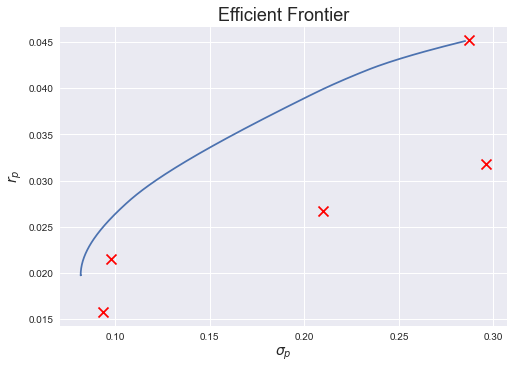

In [74]:
efficient_frontier(avg_ret, cov)

# Test

In [99]:
# P matrix is the covariance matrix
P = opt.matrix(cov)
q = opt.matrix(np.zeros((n, 1)))

In [100]:
G = opt.matrix(-np.identity(n))

In [101]:
np.array(G)

array([[-1., -0., -0.],
       [-0., -1., -0.],
       [-0., -0., -1.]])

In [102]:
h = opt.matrix(np.zeros((n,1)))

In [103]:
A = opt.matrix(np.concatenate((
                np.transpose(np.array(avg_ret))[None,:], 
                np.transpose(np.ones((n,1)))), 0))

In [104]:
np.array(A)

array([[14.,  8., 20.],
       [ 1.,  1.,  1.]])

In [105]:
b = opt.matrix(np.array([16, 1]))

In [106]:
np.array(A)

array([[14.,  8., 20.],
       [ 1.,  1.,  1.]])

In [90]:
np.ones((n,1))

array([[1.],
       [1.],
       [1.]])

In [91]:
-np.transpose(np.array(avg_ret))[None,:]

array([[-14,  -8, -20]])

In [92]:
A = np.concatenate((
                -np.transpose(np.array(avg_ret))[None,:], 
                np.transpose(np.ones((n,1)))), 0)

In [93]:
np.transpose(np.array(avg_ret))[None,:].shape

(1, 3)

In [94]:
np.ones((n,1)).shape

(3, 1)

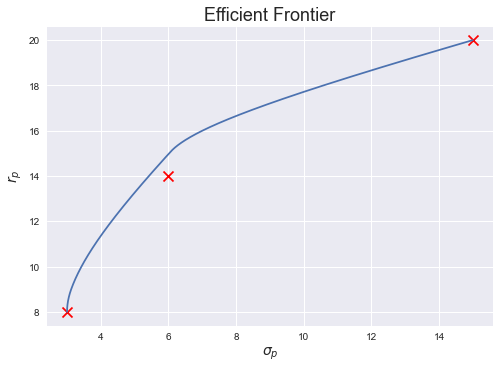

In [95]:
efficient_frontier(avg_ret, cov)

In [96]:
def efficient_frontier(r̄, cov):
    opt.solvers.options['show_progress'] = False
    n = len(r̄)
    
    # minimize
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((n, 1)))
    
    # subject to inequality constraints
    G = opt.matrix(-np.identity(n))
    h = opt.matrix(np.zeros((n,1)))
    
    
    # subject to equality constraints
    A = opt.matrix(np.concatenate((
                np.transpose(np.array(r̄))[None,:], 
                np.transpose(np.ones((n,1)))), 0))
   
    min_r̄ = min(r̄)
    max_r̄ = max(r̄)
    R_π = []
    σ_π = []
    for r in np.arange(min_r̄, max_r̄, 0.001):
        b = opt.matrix(np.array([r, 1]))
        sol = opt.solvers.qp(P, q, G, h, A, b)
        weights = np.array(sol['x'])
        R_π.append(weights.T@r̄)
        σ_π.append((weights.T@cov@weights)[0])
        
    σs = np.diag(cov)
    
    plt.title('Efficient Frontier', size = 18)
    plt.plot(np.sqrt(σ_π), R_π)
    plt.scatter(np.sqrt(σs), r̄, marker='x', color='red', s=100)
    

    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)
    plt.show()
        

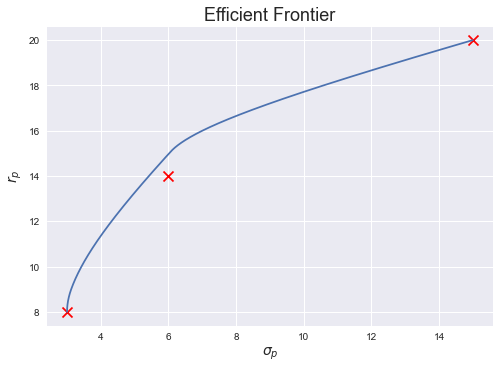

In [97]:
efficient_frontier(avg_ret, cov)